<div align="center">

# Prédiction de la souscription d'un dépôt à terme  

## Analyse exploratoire des données (EDA)

<img src="https://raw.githubusercontent.com/komiadok/termdepositforecast/main/cover_image.jpg" width="500"/>

</div>

<div style="background-color:#008080; color:white; padding:15px; border-radius:8px; font-weight:bold; font-size:16px;">
📚 Chargement des librairies
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<div style="background-color:#008080; color:white; padding:15px; border-radius:8px; font-weight:bold; font-size:16px;">
🗃️ Partie 1 : Importation des données
</div>

In [2]:
# Chargement du dataset
data = pd.read_csv('../data/raw/bank-additional-full.csv', sep = ';')
print(f'Taille du dataframe : {data.shape}')

# Aperçu du dataset
data.head()

Taille du dataframe : (41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


<div style="background-color:#008080; color:white; padding:15px; border-radius:8px; font-weight:bold; font-size:16px;">
⚙️ Partie 2 : Data Preprocessing
</div>

In [3]:
# Définition du chemin où se trouve utils
import sys
sys.path.append('../pipelines/')  

# Importation de la classe
from preprocess import DataCleaningPipeline

In [4]:
# Instancier le pipeline
pipeline = DataCleaningPipeline(
    min_age=18,
    max_duration=300,
    max_calls=5,
    output_dir='../data/outputs'
)

# Transformation du DataFrame
cleaned_data = pipeline.fit_transform(data)
print(f'Taille du dataframe : {cleaned_data.shape}')

# Vérifier les premières lignes
cleaned_data.head()

Taille du dataframe : (41183, 31)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,missing_job,missing_marital,missing_education,missing_default,missing_housing,missing_loan,outlier_duration,outlier_campaign,outlier_previous,never_contacted
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,False,False,False,False,False,False,False,False,False,True
1,57,services,married,high.school,missing,no,no,telephone,may,mon,...,False,False,False,True,False,False,False,False,False,True
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,False,False,False,False,False,False,False,False,False,True
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,False,False,False,False,False,False,False,False,False,True
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,False,False,False,False,False,False,True,False,False,True


<div style="background-color:#008080; color:white; padding:15px; border-radius:8px; font-weight:bold; font-size:16px;">
🎯 Partie 3 : Impact des variables sur la souscription
</div>

### 👤 Variables socio-démographiques

#### age

Dans le cadre de l’analyse exploratoire, la variable `age` a été subdivisée en segments afin de mieux refléter les profils et besoins des clients.<br> Cette segmentation repose sur un découpage en classes homogènes, fréquemment utilisées dans le secteur bancaire et marketing :
* **18-24 ans** : Jeunes adultes, phase d’entrée dans la vie active, besoins de bancarisation initiale (compte courant, carte, prêt étudiant).
* **25-29 ans** : Jeunes actifs, début de carrière, premiers projets d'épargne ou de crédit.
* **30-39 ans** : Adultes établis, installation familiale, crédits immobiliers, assurance vie.
* **40-49 ans** : Maturité professionnelle, revenus consolidés, diversification patrimoniale.
* **50-59 ans** : Préparation de la retraite, désendettement progressif, transmission.
* **60 ans et plus** : Seniors, gestion de patrimoine, retraite, assurance santé/dépendance.

L'objectif de ce découpage est de : 
1. Améliorer l’interprétation des analyses en regroupant des comportements financiers similaires.
2. Aligner l’analyse sur les pratiques marketing utilisées dans le secteur bancaire (cycle de vie client).
3. Faciliter la personnalisation des offres et campagnes en fonction de la tranche d’âge.

**Source**

[Segmentation du marché](https://en.wikipedia.org/wiki/Market_segmentation)

In [5]:
# Copie du DataFrame
eda_data = cleaned_data.copy()

# Définition des bornes et labels
bins = [18, 24, 29, 39, 49, 59, np.inf]
labels = ["18-24", "25-29", "30-39", "40-49", "50-59", "60+"]

# Création de la colonne 'age_group'
eda_data['age_group'] = pd.cut(eda_data['age'], bins=bins, labels=labels, right=True)

eda_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,missing_marital,missing_education,missing_default,missing_housing,missing_loan,outlier_duration,outlier_campaign,outlier_previous,never_contacted,age_group
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,False,False,False,False,False,False,False,False,True,50-59
1,57,services,married,high.school,missing,no,no,telephone,may,mon,...,False,False,True,False,False,False,False,False,True,50-59
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,False,False,False,False,False,False,False,False,True,30-39
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,False,False,False,False,False,False,False,False,True,40-49
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,False,False,False,False,False,True,False,False,True,50-59


In [6]:
# Mapping des valeurs
eda_data['y'] = eda_data['y'].map({'no': 0, 'yes': 1})

# Conversion en 'int'
eda_data['y'] = eda_data['y'].astype(int)

In [7]:
# Définition du chemin où se trouve utils
import sys
sys.path.append('../')  

# Importation des fonctions à utiliser
from utils import plot_subscription_rate

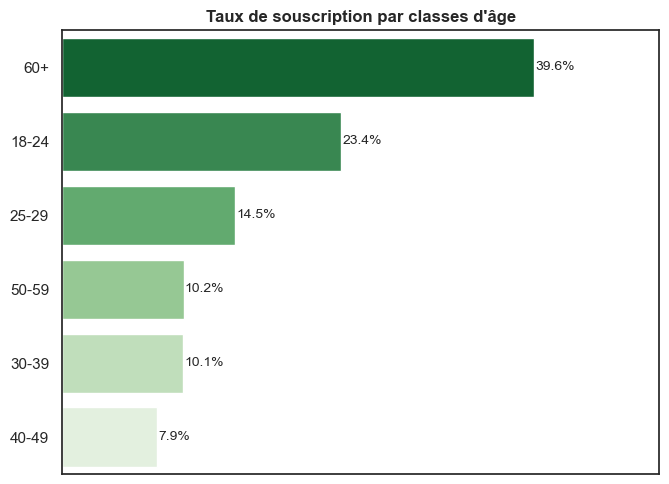

In [8]:
# Configuration du style sans grille
sns.set_theme(style='white')  # Style clair sans grilles

# Création de la Figure et des axes
fig, ax = plt.subplots(figsize=(7, 5))

# Construction du diagramme à barres
plot_subscription_rate(ax, eda_data, 'age_group', "Taux de souscription par classes d'âge")

# Ajustements
plt.tight_layout()        # ajustement automatique des marges 
plt.xlim(0,0.5)           # limites de l'axe X de 0 à 0.5 (0% à 50%)

# Affichage du graphique
plt.show()

**Obervation**

L’analyse exploratoire du taux de souscription montre des disparités importantes selon les tranches d’âge :
* La tranche des **60 ans et plus** présente le taux de souscription le plus élevé (**39.6%**), ce qui indique que ce segment est particulièrement réceptif aux offres de dépôt à terme.
* Les jeunes adultes (**18-24 ans**) suivent avec un taux de souscription de **23,4%**, tandis que les tranches **25-29 ans** atteignent **14,5%**.
* Les taux pour les tranches intermédiaires (**30-39 ans : 10,1% et 40-49 ans : 7,9%**) sont nettement plus faibles, suggérant une moindre appétence pour le produit à ce stade de la vie active.
* La tranche **50-59 ans** se situe à **10,2%**, restant modeste par rapport aux 60+.

**Interprétation**

* Le taux croissant chez les seniors peut refléter une capacité d'épargne plus élevée et une volonté de sécuriser leurs placements.
* Les jeunes adultes montrent une sensibilité notable aux offres, ce qui peut être exploité par des campagnes marketing ciblées avec des messages adaptés. Bien que leur capacité d’épargne soit plus limitée, ils sont souvent ouverts à découvrir les produits bancaires et à souscrire des placements simples pour débuter leur expérience financière.
* Les tranches intermédiaires, moins réceptives, probablement parce qu’elles conjuguent dépenses courantes, crédits et obligations familiales, ce qui réduit leur capacité ou leur motivation à souscrire à ce type de produit.

**Recommandation**

* Prioriser les campagnes de communication et d’acquisition vers les segments 60+ et 18-24 ans pour maximiser le rendement des actions marketing.
* Développer des offres spécifiques ou des incentives pour les tranches intermédiaires afin d’augmenter leur taux de souscription.

#### job

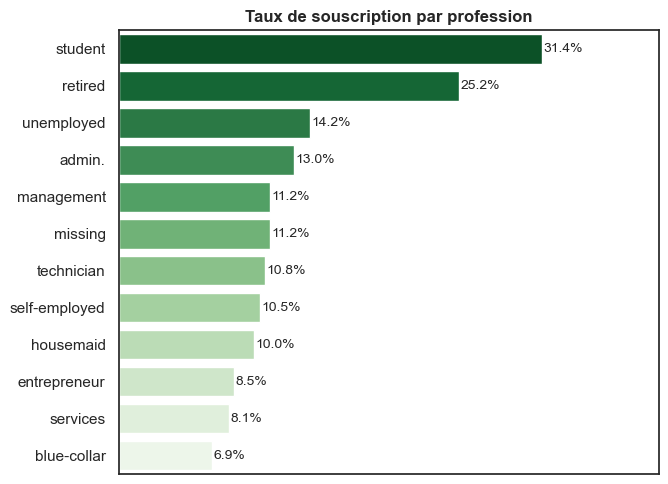

In [9]:
# Configuration du style sans grille
sns.set_theme(style='white')  # Style clair sans grilles

# Création de la Figure et des axes
fig, ax = plt.subplots(figsize=(7, 5))

# Construction du diagramme à barres
plot_subscription_rate(ax, eda_data, 'job', "Taux de souscription par profession")

# Ajustements
plt.tight_layout()        # ajustement automatique des marges 
plt.xlim(0,0.4)           # limites de l'axe X de 0 à 0.5 (0% à 40%)

# Affichage du graphique
plt.show()

**Observation**

L’analyse du taux de souscription montre des différences significatives selon les segments professionnels :
* Les **étudiants** présentent le taux de souscription le plus élevé (**31,4%**), suivis des **retraités** (**25,2%**). Cela suggère que ces deux groupes sont particulièrement réceptifs aux offres de dépôt à terme, malgré des motivations financières différentes (épargne sécurisée pour les retraités, premières démarches financières pour les étudiants).
* Les **chômeurs** affichent un taux de **14,2%**, indiquant une sensibilité modérée aux offres.
* Les professions intermédiaires comme **administratif** (**13%**), **management** (**11,2%**) et **technicien** (**10,8%**) montrent des taux plus modestes.
* Les **entrepreneurs** (**8,5%**), **métiers de services** (**8,1%**) et **ouvriers** (**6,9%**) ont les taux les plus faibles, ce qui peut refléter soit un moindre intérêt pour ce type de produit, soit une moindre capacité d’épargne disponible.
* La catégorie **missing** (**11,2%**) suggère que les données manquantes doivent être traitées avec prudence dans les analyses futures.

**Interprétation**

* Les taux élevés chez les étudiants et les retraités indiquent deux segments prioritaires pour les campagnes marketing. Les étudiants cherchent à mettre de l’argent de côté en toute sécurité, tandis que les retraités ont souvent une épargne accumulée et une préférence pour les produits stables.
* Les professions intermédiaires et salariées (administratif, management, technicien) ont des taux modérés (10-13%), reflétant un intérêt limité pour les produits à faible rendement, car elles peuvent privilégier d’autres types de placements ou investissements.
* Les entrepreneurs, ouvriers et professions de services présentent les taux les plus faibles (<9%), possiblement en raison d’une priorité sur la liquidité et le financement de projets professionnels ou familiaux plutôt que sur les dépôts à terme.

**Recommandation**

* Concentrer les efforts marketing sur les **étudiants et retraités**.
* Explorer des campagnes personnalisées pour les segments intermédiaires et les professions à taux faible.
* Traiter les données manquantes pour affiner les analyses futures.

#### marital

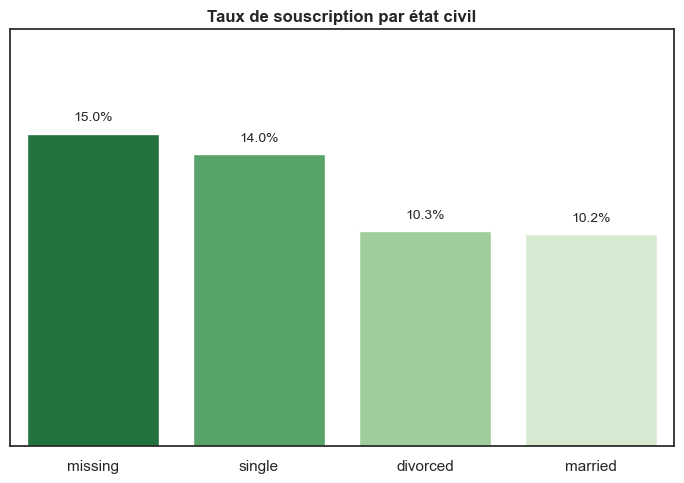

In [10]:
# Configuration du style sans grille
sns.set_theme(style='white')  # Style clair sans grilles

# Création de la Figure et des axes
fig, ax = plt.subplots(figsize=(7, 5))

# Construction du diagramme à barres
plot_subscription_rate(ax, eda_data, 'marital', "Taux de souscription par état civil", orientation='vertical')

# Ajustements
plt.tight_layout()        # ajustement automatique des marges 
plt.ylim(0,0.2)           # limites de l'axe X de 0 à 0.5 (0% à 20%)

# Affichage du graphique
plt.show()

**Observation**

* La catégorie **missing** (données manquantes) présente le taux le plus élevé (**15%**), ce qui suggère que certaines informations non renseignées pourraient être associées à une souscription plus fréquente ou à des profils particuliers.
* Les **célibataires** suivent avec un taux de **14%**, indiquant une réceptivité relativement élevée aux offres de dépôt à terme.
* Les **divorcés** (**10,3%**) et les **mariés** (**10,2%**) montrent des taux plus modestes, reflétant un intérêt moindre pour le produit dans ces segments.

**Interprétation**

* Les célibataires et les profils pour lesquels l’état civil est manquant sont les segments les plus réceptifs. Les célibataires peuvent disposer de revenus plus flexibles et moins d’engagements financiers familiaux, ce qui favorise la souscription.
* Les autres catégories (divorcés et mariés) présentent des taux plus faibles, sûrement liés à des charges familiales plus importantes et une allocation de budget prioritairement dirigée vers le logement, les études des enfants ou le remboursement de crédits.

**Recommandation**

* Prioriser les actions marketing sur les célibataires et analyser plus en détail la catégorie missing pour mieux comprendre ce segment.
* Envisager des offres personnalisées ou incitations spécifiques pour les segments à taux plus faible.

#### education

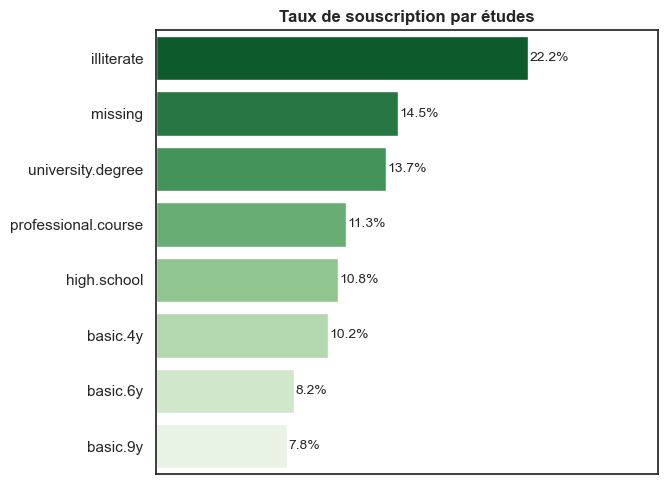

In [11]:
# Configuration du style sans grille
sns.set_theme(style='white')  # Style clair sans grilles

# Création de la Figure et des axes
fig, ax = plt.subplots(figsize=(7, 5))

# Construction du diagramme à barres
plot_subscription_rate(ax, eda_data, 'education', "Taux de souscription par études")

# Ajustements
plt.tight_layout()        # ajustement automatique des marges 
plt.xlim(0,0.3)           # limites de l'axe X de 0 à 0.5 (0% à 30%)

# Affichage du graphique
plt.show()

**Observation**

Les résultats montrent des tendances intéressantes en fonction du niveau de formation :
* Les **personnes analphabètes** (**22,2%**) présentent le taux de souscription le plus élevé. Cela peut refléter une préférence pour des produits simples et sécurisés, ou un segment spécifique de la population avec une épargne disponible limitée mais orientée vers des placements garantis.
* La catégorie **missing** (**14,5%**) suit, indiquant que les informations manquantes doivent être traitées avec prudence et pourraient représenter un segment sensible aux campagnes marketing.
* Les **individus titulaires d’un diplôme universitaire** (**13,7%**) et **ceux ayant suivi un cours professionnel** (**11,3%**) montrent des taux intermédiaires. Cela pourrait s’expliquer par une diversification de leurs investissements : ils peuvent être attirés par des produits plus complexes ou à rendement plus élevé que les dépôts à terme classiques.
* Les **diplômés du lycée** (**10,8%**) et des **niveaux de base** (basic.4y : 10,2%, basic.6y : 8,2%, basic.9y : 7,8%) ont des taux plus faibles, suggérant soit une capacité d’épargne plus limitée, soit une préférence pour d’autres produits financiers.

**Interprétation**

* Les taux les plus élevés chez les segments illiterate et missing indiquent que la simplicité et la sécurité du produit sont des facteurs déterminants.
* Les niveaux d’études plus élevés ne garantissent pas forcément un taux plus élevé : ces clients peuvent diversifier leur épargne dans d’autres produits plus complexes ou à rendement plus attractif.
* Les campagnes marketing devraient être adaptées au niveau de formation : pédagogie pour les segments peu instruits, mise en avant du rendement et des garanties pour les niveaux d’études plus élevés.

**Recommandation**

1. Cibler prioritairement les personnes analphabètes et la catégorie missing avec des messages simples et clairs sur la sécurité et la simplicité du produit.
2. Adapter la communication pour les diplômés et les profils plus instruits, en mettant en avant :
    * la sécurité et la garantie du capital
    * la simplicité d'accès et la flexibilité du produit
3. Segmenter les campagnes en fonction du niveau d’études pour maximiser la pertinence et l’efficacité des actions marketing.

### 💳 Variables financières

#### default

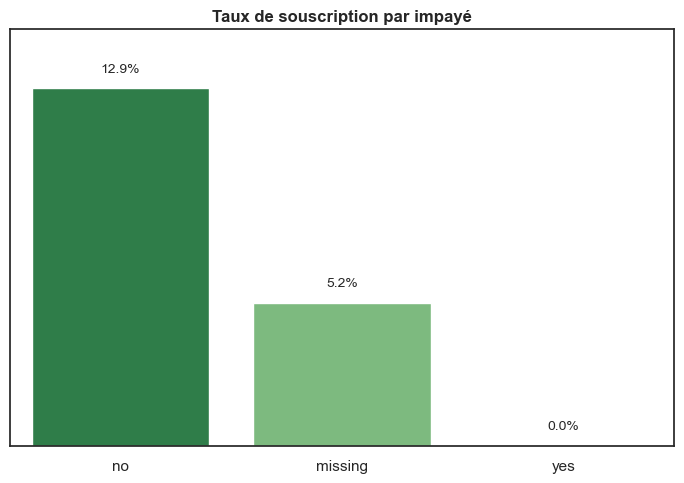

In [12]:
# Configuration du style sans grille
sns.set_theme(style='white')  # Style clair sans grilles

# Création de la Figure et des axes
fig, ax = plt.subplots(figsize=(7, 5))

# Construction du diagramme à barres
plot_subscription_rate(ax, eda_data, 'default', "Taux de souscription par impayé", orientation='vertical')

# Ajustements
plt.tight_layout()        # ajustement automatique des marges 
plt.ylim(0,0.15)           # limites de l'axe X de 0 à 0.5 (0% à 15%)

# Affichage du graphique
plt.show()

**Observation**

Les résultats montrent une relation claire entre l’historique de défaut de paiement et le taux de souscription :
* Les **clients n’ayant jamais eu de défaut** affichent un taux de souscription de **12,9%**, le plus élevé parmi les catégories. Cela reflète une confiance et une stabilité financière, rendant ces clients plus enclins à souscrire à un dépôt à terme.
* Les **clients avec données manquantes** ont un taux de **5,2%**, ce qui suggère que l’absence d’information sur leur historique peut limiter la capacité à souscrire, ou reflète un profil plus prudent.
* Les **clients ayant déjà eu un défaut** présentent un taux de souscription de **0,0%**, indiquant que ces clients sont très peu enclins à souscrire, probablement en raison de restrictions bancaires, d’un accès limité aux produits ou d’une prudence accrue des établissements financiers.

**Interprétation**

* La variable `default` est un facteur clé pour la souscription : un historique financier sain favorise l’accès et la confiance envers les produits bancaires.
* Les clients avec impayés passés constituent un segment à risque, peu rentable pour ce type de produit, et devraient être ciblés avec d’autres produits plus adaptés ou faire l’objet d’une gestion spécifique du risque.
* Les missing peuvent représenter un segment potentiel à investiguer, mais les informations manquantes doivent être complétées pour mieux comprendre leur comportement.

**Recommandation**

1. Cibler en priorité les clients sans défaut pour maximiser le taux de souscription.
2. Ne pas proposer systématiquement le dépôt à terme aux clients ayant eu un défaut, sauf si des conditions spécifiques sont mises en place.
3. Analyser la catégorie missing pour déterminer si ces clients peuvent être segmentés ou si des mesures de collecte de données supplémentaires sont nécessaires.

#### housing

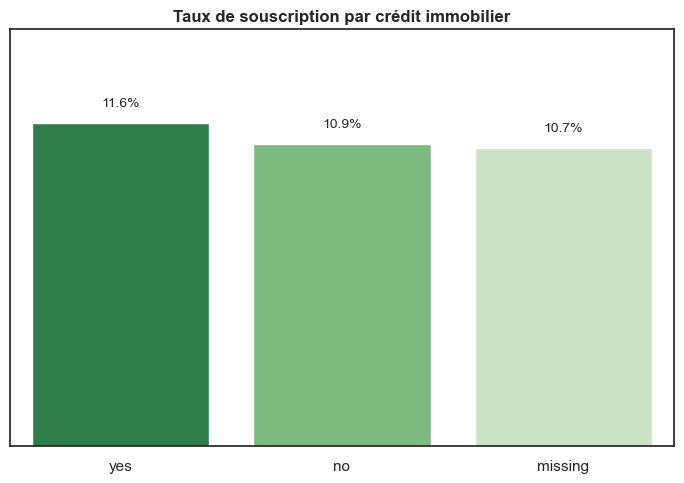

In [13]:
# Configuration du style sans grille
sns.set_theme(style='white')  # Style clair sans grilles

# Création de la Figure et des axes
fig, ax = plt.subplots(figsize=(7, 5))

# Construction du diagramme à barres
plot_subscription_rate(ax, eda_data, 'housing', "Taux de souscription par crédit immobilier", orientation='vertical')

# Ajustements
plt.tight_layout()        # ajustement automatique des marges 
plt.ylim(0,0.15)           # limites de l'axe X de 0 à 0.5 (0% à 15%)

# Affichage du graphique
plt.show()

**Observation**

Les résultats montrent que la détention d’un crédit immobilier n’a qu’un impact modéré sur le taux de souscription au dépôt à terme :
* Les **clients ayant un crédit immobilier** présentent un taux de souscription de **11,6%**, légèrement supérieur aux autres segments. Cela peut s’expliquer par une stabilité financière relative et la capacité à gérer à la fois un crédit et une épargne supplémentaire.
* Les **clients sans crédit immobilier** ont un taux de **10,9%**, très proche du segment précédent, indiquant que l’absence de crédit n’est pas un frein à la souscription.
* La catégorie **missing** (**10,7%**) montre un taux similaire, suggérant que les informations manquantes n’affectent pas fortement la propension à souscrire pour ce produit.

**Interprétation**

* Le crédit immobilier n’est pas un facteur déterminant pour la souscription au dépôt à terme : les clients avec ou sans crédit montrent des comportements très similaires.
* La légère supériorité du taux chez les détenteurs de crédit immobilier pourrait refléter une discipline financière accrue ou une relation bancaire plus consolidée.
* La catégorie missing reste à surveiller, mais elle ne semble pas introduire de biais majeur.

**Recommandation**

1. Pas de ciblage prioritaire basé uniquement sur le crédit immobilier, car la différence de taux est faible.
2. Intégrer cette variable dans des analyses combinées (âge, profession, état civil, études) pour identifier des segments plus précis et réceptifs.
3. Les clients ayant un crédit immobilier peuvent être réceptifs à des offres combinant épargne et financement, mais cela nécessite des messages adaptés.

#### loan

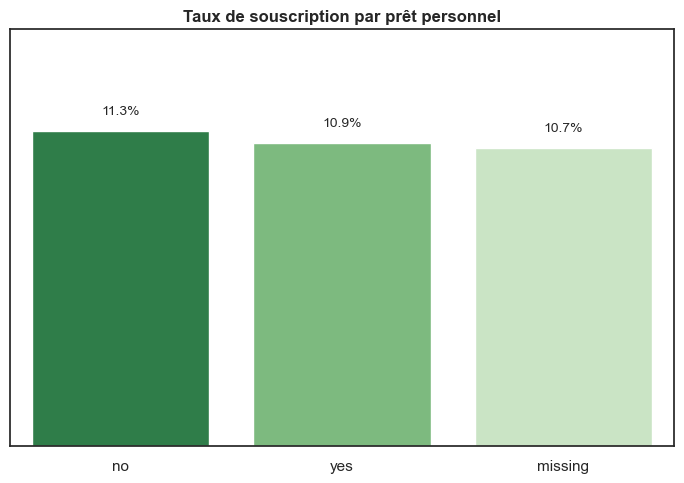

In [14]:
# Configuration du style sans grille
sns.set_theme(style='white')  # Style clair sans grilles

# Création de la Figure et des axes
fig, ax = plt.subplots(figsize=(7, 5))

# Construction du diagramme à barres
plot_subscription_rate(ax, eda_data, 'loan', "Taux de souscription par prêt personnel", orientation='vertical')

# Ajustements
plt.tight_layout()        # ajustement automatique des marges 
plt.ylim(0,0.15)           # limites de l'axe X de 0 à 0.5 (0% à 15%)

# Affichage du graphique
plt.show()

**Observation**

Les résultats indiquent que la détention d’un crédit immobilier n’influence que légèrement le taux de souscription au dépôt à terme :
* Les **clients sans crédit immobilier** présentent un taux de souscription de **11,3%**, légèrement supérieur aux détenteurs de crédit.
* Les **clients ayant un crédit immobilier** ont un taux de **10,9%**, indiquant une différence marginale par rapport aux autres segments.
* La catégorie **missing** (**10,7%**) est très proche des deux précédentes, suggérant que l’absence d’information ne modifie pas significativement le comportement de souscription.

**Interprétation**

* La possession d’un crédit immobilier n’est pas un facteur déterminant pour la souscription à ce type de produit.
* La légère différence entre les segments peut refléter une prudence des détenteurs de crédit ou une allocation de budget prioritairement orientée vers le remboursement du prêt.
* Les clients sans crédit peuvent disposer de plus de flexibilité financière pour souscrire à un produit d’épargne comme le dépôt à terme.

**Recommandation**

1. Ne pas segmenter les campagnes uniquement sur la base du crédit immobilier, car la différence de taux est faible.
2. Combiner cette variable avec d’autres facteurs (âge, profession, état civil, études, default) pour identifier des segments plus réceptifs et affinés.
3. Adapter éventuellement la communication pour les détenteurs de crédit immobilier, en mettant en avant la facilité de souscription et la sécurité du placement, sans les sur-solliciter.

### ☎️ Variables liées à la campagne de prospection

#### contact

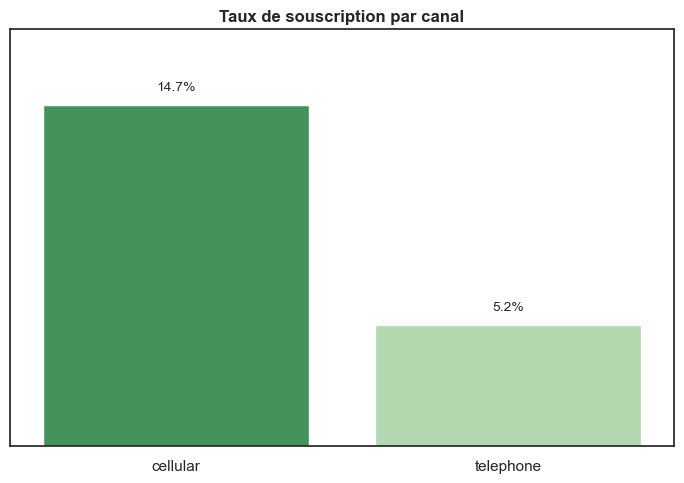

In [15]:
# Configuration du style sans grille
sns.set_theme(style='white')  # Style clair sans grilles

# Création de la Figure et des axes
fig, ax = plt.subplots(figsize=(7, 5))

# Construction du diagramme à barres
plot_subscription_rate(ax, eda_data, 'contact', "Taux de souscription par canal", orientation='vertical')

# Ajustements
plt.tight_layout()        # ajustement automatique des marges 
plt.ylim(0,0.18)           # limites de l'axe X de 0 à 0.5 (0% à 18%)

# Affichage du graphique
plt.show()